
# ST1800 ALMACENAMIENTO Y RECUPERACIÓN DE INFORMACIÓN,
2023-2 PROFESOR: EDWIN MONTOYA
*  emontoya@eafit.edu.co
* Trabajo 2
*  analítica de texto


Elaborado por:



*   Maria Alejandra Reyes Afanador
*   Juan Sebastian Sanin Villarreal
*  Juan Felipe Cardona Arango



# Preparacion del entorno de trabajo.

In [ ]:
# cargar las librerias necesarias
## 1. nltk para 'procesamiento natural del lenguaje'
## 2. pandas para procesamiento de dataframes, muy usado en preparación de datos
## 3. re - expresiones regulares
## 4. numpy, codecs, etc - otras



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dependencias que eventualmente requerirá instalar:
!pip install nltk
!pip install pandas
!pip install matplotlib
!pip install gensim
!pip install pyLDAvis
!pip install --upgrade scikit-learn
!pip install numpy

In [ ]:
import numpy as np
import nltk
import pandas as pd
import re
import codecs
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora import Dictionary
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaModel
from gensim.models.ldamulticore import LdaMulticore
import multiprocessing as mp
import time
from wordcloud import WordCloud
import plotly.express as px
from sklearn.decomposition import PCA
from gensim.models import CoherenceModel
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
# directorios (path) de entrada y salida:
#
path_in="gdrive/MyDrive/st1800-232/datasets/"
path_out="gdrive/MyDrive/st1800-232/out/"
filename='twitterClimateData.csv'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Definicion de stopwords en español
stop_words_nltk = set(stopwords.words('spanish'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Definicion de stopwords en ingles
stop_words_nltk_en = set(stopwords.words('english'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Definicion de stopwords en aleman
stop_words_nltk_ger = set(stopwords.words('german'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Definicion de stopwords en portugues
stop_words_nltk_por = set(stopwords.words('portuguese'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Definicion de stopwords en holandes
stop_words_nltk_du = set(stopwords.words('dutch'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Definicion de stopwords en frances
stop_words_nltk_fre = set(stopwords.words('french'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Importar la Fuente de Datos

In [ ]:
!pwd

/content


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# abrir un archivo con pandas desde aws s3
#df = pd.read_csv('s3://emontoyapublic/doaj_1.csv',delimiter=',')
df = pd.read_csv("/content/drive/MyDrive/st1800-232/datasets/twitterClimateData.csv", delimiter=';')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.21067e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.21059e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"
3,3,1.21026e+18,1.339821e+09,"A year of resistance, as youth protests shaped...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA"
4,4,1.20964e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA"


# Analisis Exploratorio de los datos.

El preambulo de este trabajo se enfoca en la fase inicial del análisis exploratorio de una base de datos de tweets. El objetivo de este proceso es evaluar la calidad de los datos y prepararlos para análisis posteriores. Mediante el dataframe, se identifica además, las variables que componen los tweets; porteriormente se identificará la correlación de estas variables con los resultados eprtinentes del análisis, así como la composición total de la información proveída, , teniendo en cuenta las interacciones que se realizan con estos tweets. El código realiza operaciones esenciales como la identificación de valores nulos, eliminación de duplicados y generación de estadísticas descriptivas.

In [ ]:
df.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.21067e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.21059e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"


In [ ]:
# se imprime dimensiones
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(72405, 15)

In [ ]:
# se imprimen las columnas
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Unnamed: 0', 'id', 'author_id', 'text', 'retweets', 'permalink',
       'date', 'formatted_date', 'favorites', 'mentions', 'hashtags', 'geo',
       'urls', 'search_hashtags', 'location'],
      dtype='object')

In [ ]:
# se imprimen los tipos de los atributos del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72405 entries, 0 to 72404
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       72405 non-null  int64  
 1   id               72405 non-null  object 
 2   author_id        72405 non-null  float64
 3   text             72405 non-null  object 
 4   retweets         72405 non-null  int64  
 5   permalink        72405 non-null  object 
 6   date             72405 non-null  object 
 7   formatted_date   72405 non-null  object 
 8   favorites        72405 non-null  int64  
 9   mentions         27554 non-null  object 
 10  hashtags         72402 non-null  object 
 11  geo              0 non-null      float64
 12  urls             33349 non-null  object 
 13  search_hashtags  72405 non-null  object 
 14  location         72405 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 8.3+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# revisando datos faltantes
df.isnull().sum()
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# se agraga una nueva columna y cuenta y imprime el porcentaje de datos
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MissvalCount,Percent
geo,72405,100.00
mentions,44851,61.94
urls,39056,53.94
hashtags,3,0.00


In [ ]:
df['text'][10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'"The change is going to come from the people demanding action..." #ClimateChange #climatestrike '

In [ ]:
# to compute a summary of statistics pertaining to the DataFrame column full_text
df['text'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count               72405
unique              42520
top       #ClimateStrike 
freq                  240
Name: text, dtype: object

In [ ]:
# to compute a summary of statistics pertaining to the DataFrame location
df['location'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count            72405
unique              15
top       Florida, USA
freq             18571
Name: location, dtype: object

En este punto, se entiende que Florida es el estado con mayor presencia en cuanto al tema de cambio climático. El análista debe considerar las opiniones de este estado puesto que El Estado del Sol, con su baja elevación y 825 millas de costa, lo convierten en uno de los lugares más vulnerables del planeta tanto al aumento del nivel del mar como a la intensificación de los fenómenos meteorológicos (Kearney, 2023).

In [ ]:
text = df['text']
location = df['location']

for i in np.random.randint(1000, size=10):
    print(f'Tweet # {i}: ', text[i], '=> Location: ', location[i], end='\n' * 3)

Tweet # 361:  “Just because I’m young doesn’t mean I can’t have opinions. And that I think it’s really something worth fighting for,” said Alienor Rice, a student #PromiseofYouth #ClimateStrike #efficacy https://www.bostonglobe.com/metro/2019/09/20/crowd-gather-for-youth-led-climate-strike-city-hall-plaza-friday-morning-part-worldwide-series-strikes/oQlTBqKStxJtJK8VfkMlMO/story.html?event=event25 via @BostonGlobe => Location:  California, USA


Tweet # 973:  Climate change is the biggest threat to the future of our lives, country, and world. Youth across the U.S. will lead a #ClimateStrike on September 20 to demand legislative action to combat climate change #StrikeWithUs => Location:  California, USA


Tweet # 18:  I get my energy and hope by organizing with young people and marching on the streets. There’s no time for despair, the is on . ⠀⠀⠀⠀⠀⠀⠀⠀⠀ #ClimateStrike #FireDrillFriday #GreenNewDeal #ShutDownDC ⠀⠀⠀⠀⠀⠀⠀⠀⠀ : @meredithettrich => Location:  California, USA


Tweet # 867:  Wow!

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
location = df.groupby('location')
location.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.21067e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.21059e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"
3,3,1.21026e+18,1.339821e+09,"A year of resistance, as youth protests shaped...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA"
4,4,1.20964e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61392,61392,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"Washington, USA"
61393,61393,1.21129e+18,8.990000e+17,They got #money for #wars but they can’t feed ...,5,https://twitter.com/NaweedAmin3/status/1211292...,2019-12-29 14:26:19+00:00,Sun Dec 29 14:26:19 +0000 2019,6,NaN,#money #wars #poverty #expensive #poor #Peacef...,NaN,https://twitter.com/Inartica/status/1209593346...,#climatestrike,"Washington, USA"
61394,61394,1.21067e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"Washington, USA"
61395,61395,1.21059e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"Washington, USA"


In [ ]:
# Limpieza de datos remocion de datos faltantes
df_np=df.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_np.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.21067e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.21059e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"
3,3,1.21026e+18,1.339821e+09,"A year of resistance, as youth protests shaped...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA"
4,4,1.20964e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA"


In [ ]:
df_np.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(72405, 15)

Teniendo en cuenta que el análsis se enfocará unicamente en el contenido de los tweets y posibles tendencias, se dejarán solo las columnas que permitan el mismo: El texto, los hashtags y 'search_hashtags'.

In [ ]:
# Se eliminar y crea un data frame que solo contenga la informacion para el analisis.
data = df.drop(['Unnamed: 0', 'id', 'author_id','retweets',
       'permalink', 'date', 'formatted_date','favorites', 'mentions',
       'geo','urls','location'], axis=1)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,hashtags,search_hashtags
0,"2020 is the year we #votethemout, the year we ...",#votethemout #climatestrike #rebelforlife,#climatestrike
1,Winter has not stopped this group of dedicated...,#climatefriday #climatestrike #ClimateAction,#climatestrike
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#ClimateStrike,#climatestrike
3,"A year of resistance, as youth protests shaped...",#greta #gretathunberg #climatechange #fridaysf...,#climatestrike
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#greta #gretathunberg #climatechange #fridaysf...,#climatestrike


In [ ]:
data3=data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(72405, 3)

# Text Preparation



Se procede a realizar operaciones de limpieza del texto, por medio de la librería string se elimina la puntuación así como por medio de



In [ ]:
#Punctuation Removal
#library that contains punctuation
import string
string.punctuation
#defininiendo funcion que remueva signos de puntuacion
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_msg']= data['text'].apply(lambda x:remove_punctuation(x))
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,hashtags,search_hashtags,clean_msg
0,"2020 is the year we #votethemout, the year we ...",#votethemout #climatestrike #rebelforlife,#climatestrike,2020 is the year we votethemout the year we cl...
1,Winter has not stopped this group of dedicated...,#climatefriday #climatestrike #ClimateAction,#climatestrike,Winter has not stopped this group of dedicated...
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#ClimateStrike,#climatestrike,WEEK 55 of ClimateStrike at the UN Next week F...
3,"A year of resistance, as youth protests shaped...",#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,A year of resistance as youth protests shaped ...
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,HAPPY HOLIDAYS greta gretathunberg climatecha...


In [ ]:
#Transformacion de caracteres de mayuscula a minuscula
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,hashtags,search_hashtags,clean_msg,msg_lower
0,"2020 is the year we #votethemout, the year we ...",#votethemout #climatestrike #rebelforlife,#climatestrike,2020 is the year we votethemout the year we cl...,2020 is the year we votethemout the year we cl...
1,Winter has not stopped this group of dedicated...,#climatefriday #climatestrike #ClimateAction,#climatestrike,Winter has not stopped this group of dedicated...,winter has not stopped this group of dedicated...
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#ClimateStrike,#climatestrike,WEEK 55 of ClimateStrike at the UN Next week F...,week 55 of climatestrike at the un next week f...
3,"A year of resistance, as youth protests shaped...",#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,A year of resistance as youth protests shaped ...,a year of resistance as youth protests shaped ...
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,HAPPY HOLIDAYS greta gretathunberg climatecha...,happy holidays greta gretathunberg climatecha...


# Parte 1 :


Aplicar las diferentes técnicas y modelos de preparación de datos, los cuales incluyen un
proceso de tokenización, optimización del BoW (con reducción de dimensionalidad),
representación de características y representación de documentos. El objetivo es obtener el BoW
más óptimo (reducido) para pasar a la fase de representación de característicos y de documentos.
(se tiene como columna de entrada ‘text’). Realizar la preparación de texto tanto en 1) librerías
python como nltk, spacy, gensim o una combinación ellas, y 2) en SparkML o SparkNLP
utilizando pyspark.

## Tokenization

In [ ]:
tokenizer = TweetTokenizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tokenización con tweet tokenizer

In [ ]:
data3['text_tokenized'] = data3['text'].apply(lambda text : tokenizer.tokenize(text))
# Eliminar simbolos y caracteres especiales
data3['text_sin_simbolos'] = data3['text_tokenized'].apply(lambda text : [word.lower() for word in text if word.isalpha()])
# Convertir mayusculas en minisculas
data3['text_sin_stopwords'] = data3['text_sin_simbolos'].apply(lambda text : [word for word in text if word not in stop_words_nltk_en and word not in stop_words_nltk and word not in stop_words_nltk_ger and word not in stop_words_nltk_por and word not in stop_words_nltk_du and word not in stop_words_nltk_fre])
# eliminar stopword de español, aleman, frances, portugues y holandes
data3['text_sin_one_letra'] = data3['text_sin_stopwords'].apply(lambda text : [word for word in text if len(word) > 1])
# eliminar palanras simples

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data3[['text','text_tokenized','text_sin_simbolos','text_sin_stopwords','text_sin_one_letra']].sample(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,text_tokenized,text_sin_simbolos,text_sin_stopwords,text_sin_one_letra
5479,"Hey, remember at the town hall this spring whe...","[Hey, ,, remember, at, the, town, hall, this, ...","[hey, remember, at, the, town, hall, this, spr...","[hey, remember, town, hall, spring, flatly, sh...","[hey, remember, town, hall, spring, flatly, sh..."
30106,"At UN #ClimateAction Summit, @PrimeMinisterGr ...","[At, UN, #ClimateAction, Summit, ,, @PrimeMini...","[at, un, summit, says, greece, will, convene, ...","[summit, says, greece, convene, conf, athens, ...","[summit, says, greece, convene, conf, athens, ..."
57618,This photo of the air quality in central Canbe...,"[This, photo, of, the, air, quality, in, centr...","[this, photo, of, the, air, quality, in, centr...","[photo, air, quality, central, canberra, right...","[photo, air, quality, central, canberra, right..."


In [ ]:
#Bag of Words: Juntar tokens
all_tokens = []
for token_list in data3['text_sin_one_letra']:
  all_tokens.extend(token_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(f"BoW: {len(all_tokens)}")

BoW: 680856


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


numero de palabras finales =  38270


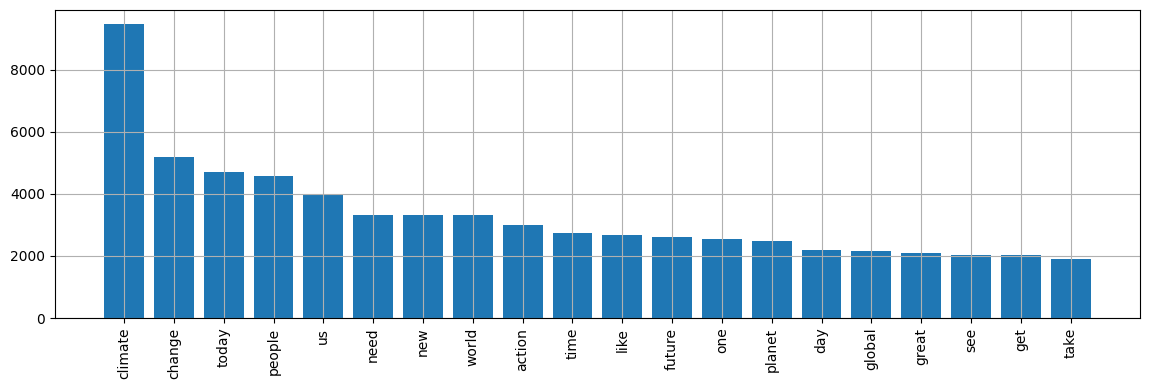

In [ ]:
fdist = nltk.FreqDist(all_tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(14,4))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Tokenización estandar

In [ ]:
def tokenization(text):
    tokens = re.split(r'\W+',text)
    return tokens
#applying function to the column
data['text_tokenied_standard']= data['text'].apply(lambda x: tokenization(x))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Eliminar simbolos y caracteres especiales
data3['text_sin_simbolos_standard'] = data3['text_tokenied_standard'].apply(lambda text : [word.lower() for word in text if word.isalpha()])
# Convertir mayusculas en minisculas
data3['text_sin_stopwords_standard'] = data3['text_sin_simbolos_standard'].apply(lambda text : [word for word in text if word not in stop_words_nltk_en and word not in stop_words_nltk and word not in stop_words_nltk_ger and word not in stop_words_nltk_por and word not in stop_words_nltk_du and word not in stop_words_nltk_fre])
# eliminar stopword de español, aleman, frances, portugues y holandes
data3['text_sin_one_letra_standard'] = data3['text_sin_stopwords_standard'].apply(lambda text : [word for word in text if len(word) > 1])
# eliminar palabras simples

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Bag of Words: Juntar tokens
all_tokens_standard = []
for token_list in data3['text_sin_one_letra_standard']:
  all_tokens_standard.extend(token_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(f"BoW: {len(all_tokens_standard)}")

BoW: 1112936


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


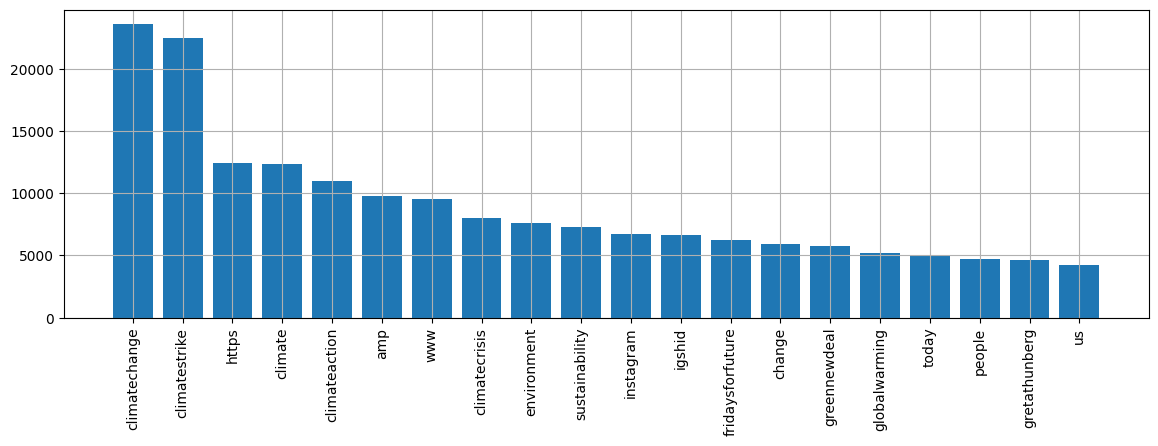

In [ ]:
fdist2 = nltk.FreqDist(all_tokens_standard)
topwords = fdist2.most_common(20)
x,y = zip(*topwords)
plt.figure(figsize=(14,4))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.grid()
plt.show()

Comparación BoW con fin de definir el BoW óptimo para el trabajo.

In [ ]:
print('numero de palabras finales con métodología estándar= ',len(fdist2))
print('numero de palabras finales con TweetTokenizer= ',len(fdist))
print('Comparación número de palabras = ', fdist2 - fdist)


numero de palabras finales con métodología estándar=  75572
numero de palabras finales con TweetTokenizer=  38270
Comparación número de palabras =  <FreqDist with 47073 samples and 432350 outcomes>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


El presente identifica que el BoW más óptimo es dado usando el método Tweet Tokenizer. Dentro de las ventajas de Tweet Tokenizer son eliminar "eliminar el código HTML, eliminar los caracteres problemáticos, eliminar los identificadores de Twitter y normalizar la longitud del texto reduciendo la aparición de letras repetidas" (Kaprash, 2021). Esto se puede identificar en las gráficas mediante las palabras con mayor frecuencia, ya que tokens como "https, amp, www" son eliminadas y no consideradas como discriminatorias; incrementando la confianza del BoW hacia un análisis con mayor precisión. Teniendo en cuenta lo anterior, la continuación del trabajo se realizará utilizando Tweet tokenizer.

## Stemming

In [ ]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tokens = [lancaster.stem(word) for word in all_tokens]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Size of new BoW title = 23937


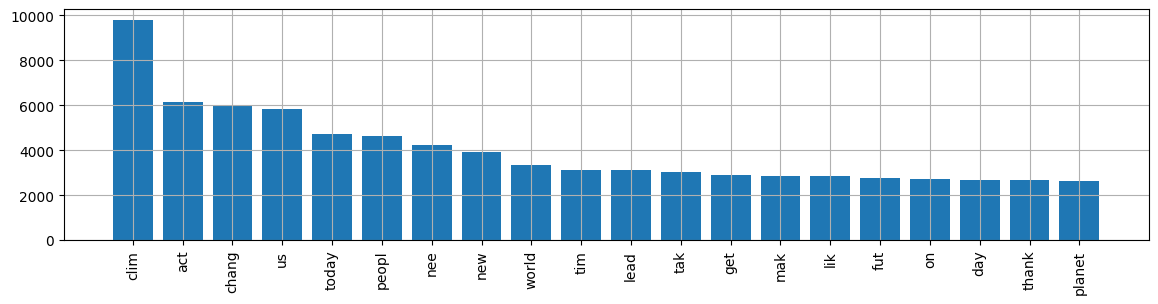

In [ ]:
fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(14,3))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.grid()
plt.show()

## Lemmatization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


numero de palabras finales =  23751


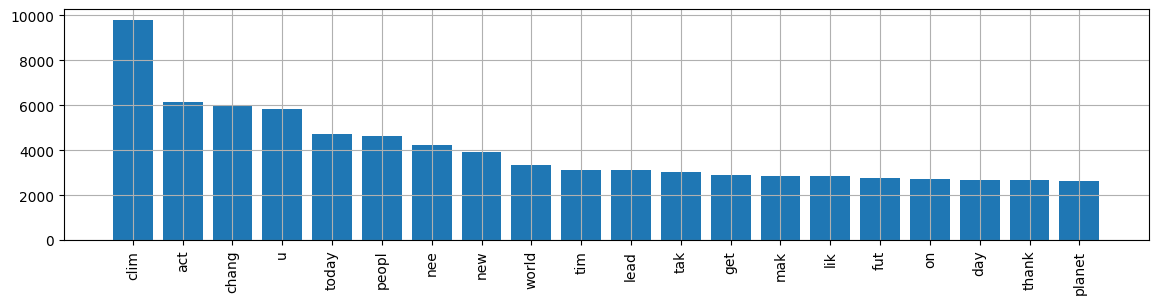

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
tokens = [wordnet_lemmatizer.lemmatize(word) for word in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(14,3))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [ ]:
# calcular la media de los retwwes, podria indicar la relevancia de un tema
df['retweets'].mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3.797348249430288

In [ ]:
# Porcesamiento a hasnthas
def preprocess_text(text):
    lancaster = LancasterStemmer()
    wordnet_lemmatizer = WordNetLemmatizer()
    #stemming_text = [lancaster.stem(word) for word in text]
    lematized_text= [wordnet_lemmatizer.lemmatize(word) for word in text]
    #clean_text = " ".join(word for word in lematized_text)
    return lematized_text

data3['texto_limpio'] = data3['text_sin_one_letra'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data3['texto_limpio_2'] = data3['texto_limpio'].apply(lambda text : " ".join(word for word in text))
data3[['texto_limpio_2']].sample(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,texto_limpio_2
49303,excluant pétrole fonds norvégien entérine prin...
17093,careful environment rinkumeenark
70289,nice seeing good environmental news coming brazil


Por medio de los procesos de identificación, el stemming y la lematización permiten reducir la BoW de 38.270 a 23.751. Mediante el Stemming, se busca optimizar los tokens para eliminar redundancia en la interpretación del análisis; por medio de la conversión de palabras a su raíz y al mismo tiempo eliminando aquellas que son consideradas stopwords; el resultado obtenido es de 23.937. Por otro lado, la lematización permite llevar a forma base las palabras, reduciendo no solo hacia la raíz, sino a su significado y la utilidad de la misma; este proceso se diferencia con el anterior en un aproximado de 200 tokens. A este punto, se considera se ha obtenido una BoW óptima para la continuación del trabajo.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Analisis de sentimiento Polaridad y Subjetividad

El análisis de sentimiento tiene como objeto identificar la subjetividad y el comportamiento de los individuos detrás de los tweets, así como su perspectiva en cuento al tema en estudio. Permitde identificar tendencias y relevancia de ciertos términos en específico. Su utilidad en el presente recae en la identificación de perspectivas de la sociedad en cuando a acciones o políticas positivas del cambio climático; así como la posible detección de problemas sociales o inconformidades que permitan conllevar a acciones inmediatas de prevención.

In [ ]:
from textblob import TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
data3['Subjectivity'] = data3["texto_limpio_2"].apply(getSubjectivity)

In [ ]:
data3['Polarity'] = data['texto_limpio_2'].apply(getpolarity)

In [ ]:
data3.head()

,text,hashtags,search_hashtags,clean_msg,msg_lower,text_tokenized,text_sin_simbolos,text_sin_stopwords,text_sin_one_letra,text_tokenied_standard,text_sin_simbolos_standard,text_sin_stopwords_standard,text_sin_one_letra_standard,texto_limpio,texto_limpio_2,Subjectivity,Polarity
0,"2020 is the year we #votethemout, the year we ...",#votethemout #climatestrike #rebelforlife,#climatestrike,2020 is the year we votethemout the year we cl...,2020 is the year we votethemout the year we cl...,"[2020, is, the, year, we, #votethemout, ,, the...","[is, the, year, we, the, year, we, our, hearts...","[year, year, hearts, year, without, liveable, ...","[year, year, hearts, year, without, liveable, ...","[2020, is, the, year, we, votethemout, the, ye...","[is, the, year, we, votethemout, the, year, we...","[year, votethemout, year, climatestrike, heart...","[year, votethemout, year, climatestrike, heart...","[year, year, heart, year, without, liveable, f...",year year heart year without liveable future n...,0.4625,-0.100000
1,Winter has not stopped this group of dedicated...,#climatefriday #climatestrike #ClimateAction,#climatestrike,Winter has not stopped this group of dedicated...,winter has not stopped this group of dedicated...,"[Winter, has, not, stopped, this, group, of, d...","[winter, has, not, stopped, this, group, of, d...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...","[Winter, has, not, stopped, this, group, of, d...","[winter, has, not, stopped, this, group, of, d...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...",winter stopped group dedicated climate activis...,0.0000,0.000000
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#ClimateStrike,#climatestrike,WEEK 55 of ClimateStrike at the UN Next week F...,week 55 of climatestrike at the un next week f...,"[WEEK, 55, of, #ClimateStrike, at, the, @UN, ....","[week, of, at, the, next, week, heads, into, i...","[week, next, week, heads, year, striking, time...","[week, next, week, heads, year, striking, time...","[WEEK, 55, of, ClimateStrike, at, the, UN, Nex...","[week, of, climatestrike, at, the, un, next, w...","[week, climatestrike, next, week, heads, year,...","[week, climatestrike, next, week, heads, year,...","[week, next, week, head, year, striking, time,...",week next week head year striking time street ...,0.5000,0.250000
3,"A year of resistance, as youth protests shaped...",#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,A year of resistance as youth protests shaped ...,a year of resistance as youth protests shaped ...,"[A, year, of, resistance, ,, as, youth, protes...","[a, year, of, resistance, as, youth, protests,...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protests, shaped, cl...","[A, year, of, resistance, as, youth, protests,...","[a, year, of, resistance, as, youth, protests,...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protest, shaped, cli...",year resistance youth protest shaped climate c...,0.6000,-0.133333
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,HAPPY HOLIDAYS greta gretathunberg climatecha...,happy holidays greta gretathunberg climatecha...,"[HAPPY, HOLIDAYS, #greta, #gretathunberg, #cli...","[happy, holidays, from, the, energy, house, team]","[happy, holidays, energy, house, team]","[happy, holidays, energy, house, team]","[, HAPPY, HOLIDAYS, greta, gretathunberg, clim...","[happy, holidays, greta, gretathunberg, climat...","[happy, holidays, greta, gretathunberg, climat...","[happy, holidays, greta, gretathunberg, climat...","[happy, holiday, energy, house, team]",happy holiday energy house team,1.0000,0.800000


In [ ]:
def getPositiveNegativeWordCount(score):
    if score < 0:
        return 'Negative'
    else:
        return 'Positive'

In [ ]:
data3['Positive Negative Word Count'] =  data3['Polarity'].apply(getPositiveNegativeWordCount)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
from wordcloud import WordCloud

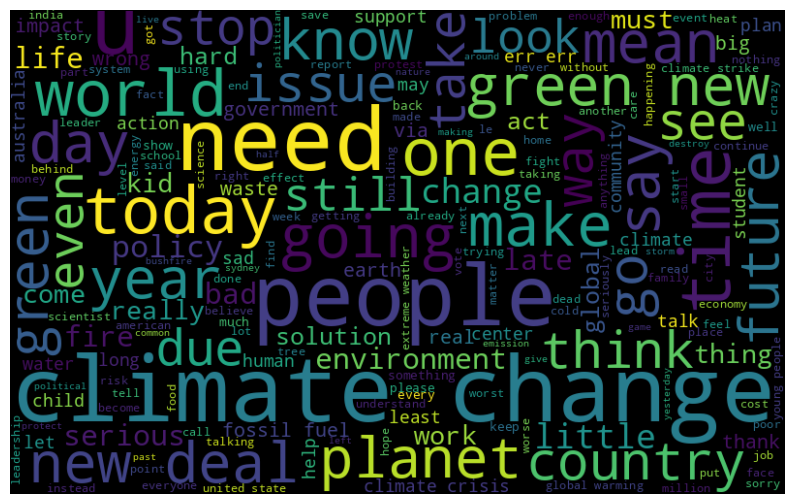

In [ ]:
#Generando analsis de palabras negativas
negative_words =' '.join([text for text in data3['texto_limpio_2'][data3['Positive Negative Word Count'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

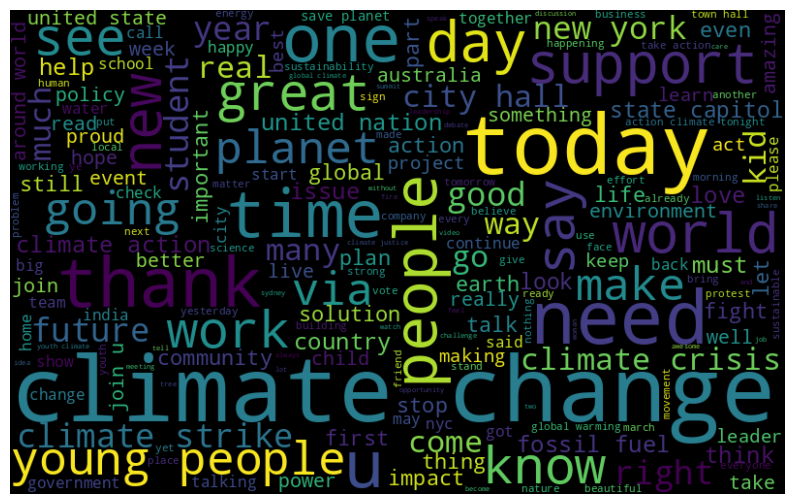

In [ ]:
## generando analisis de palabras positivas
positive_words =' '.join([text for text in data3['texto_limpio_2'][data3['Positive Negative Word Count'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Nube de palabras

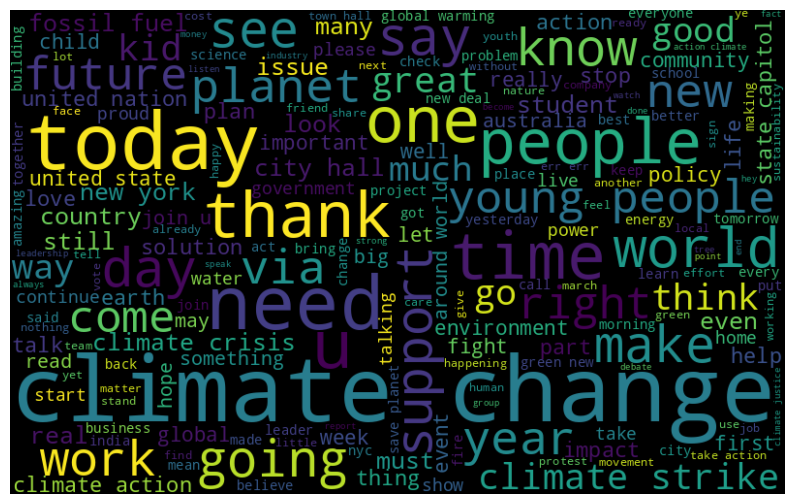

In [ ]:
all_words = ' '.join([text for text in data['texto_limpio_2']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

LDA

In [ ]:
from gensim.corpora import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaModel
from gensim.models.ldamulticore import LdaMulticore
import multiprocessing as mp
import time

In [ ]:
def preprocess_text(text):
    lancaster = LancasterStemmer()
    wordnet_lemmatizer = WordNetLemmatizer()
    #stemming_text = [lancaster.stem(word) for word in text]
    lematized_text= [wordnet_lemmatizer.lemmatize(word) for word in text]
    #clean_text = " ".join(word for word in lematized_text)
    return lematized_text

data3['texto_limpio_3'] = data3['texto_limpio_2'].apply(preprocess_text)

In [ ]:
dictionary = Dictionary(data3["texto_limpio_3"])

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in data3["texto_limpio_3"]]

In [ ]:
print(corpus[:5])

[[(0, 13), (1, 7), (2, 1), (3, 1), (4, 13), (5, 1), (6, 2), (7, 4), (8, 4), (9, 3), (10, 1), (11, 3), (12, 3), (13, 7), (14, 2), (15, 9), (16, 3), (17, 1), (18, 1), (19, 4)], [(0, 7), (1, 4), (3, 4), (4, 7), (5, 1), (6, 1), (8, 5), (9, 4), (10, 2), (11, 1), (12, 4), (13, 2), (14, 2), (15, 6), (16, 1), (17, 1), (18, 2), (20, 3), (21, 4), (22, 1)], [(0, 24), (1, 7), (3, 4), (4, 22), (6, 6), (7, 2), (8, 12), (9, 4), (10, 4), (11, 11), (12, 8), (13, 6), (14, 9), (15, 16), (16, 2), (18, 3), (19, 2), (20, 3), (21, 5), (22, 2), (23, 4)], [(0, 10), (1, 6), (3, 2), (4, 9), (6, 1), (7, 4), (8, 5), (9, 1), (10, 1), (11, 3), (12, 5), (13, 3), (14, 7), (15, 8), (16, 3), (17, 2), (19, 3), (20, 5), (21, 2)], [(0, 4), (1, 3), (3, 1), (4, 4), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (19, 3), (21, 2)]]


In [ ]:
print(dictionary)

Dictionary<596 unique tokens: [' ', 'a', 'b', 'd', 'e']...>


In [ ]:
t0 = time.time()
pool = mp.Pool(mp.cpu_count())
doc_term_matrix = pool.map(dictionary.doc2bow, [sentence for sentence in data3.texto_limpio_3])
pool.close()
print(time.time()-t0)

2.2196667194366455


In [ ]:
list(np.arange(3,10,1))

[3, 4, 5, 6, 7, 8, 9]

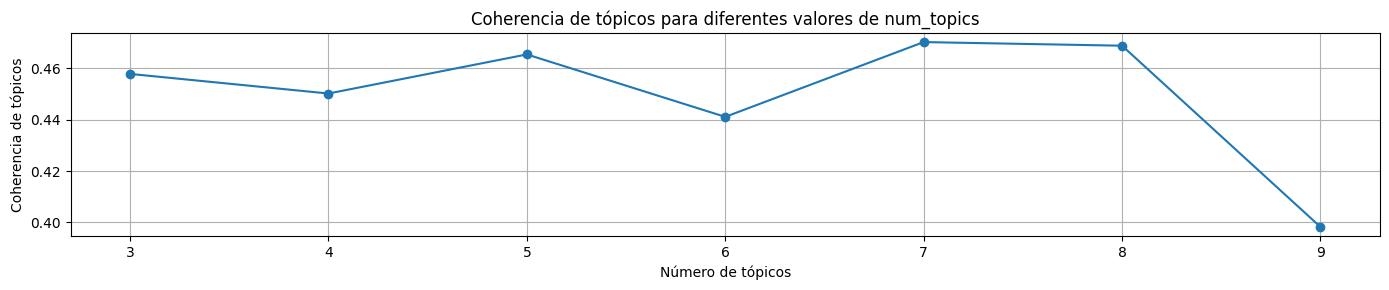

El número óptimo de tópicos basado en coherencia de tópicos es: 7


In [ ]:
#Tomado de https://github.com/st1800eafit/st1800-232/blob/main/text-mining/lda-ejemplo1/lda-gensim-example.ipynb

# Entrenar el modelo LDA con diferentes valores de num_topics
num_topics_list = list(np.arange(3,10,1))
coherence_scores = []

for num_topics in num_topics_list:
    lda_model = LdaMulticore(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=10, workers=10)

    # Calcular la coherencia de tópicos
    coherence_model = CoherenceModel(model=lda_model, texts=data3['texto_limpio_3'].values.tolist(), dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Graficar las métricas
plt.figure(figsize=(14, 3))
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.xlabel("Número de tópicos")
plt.ylabel("Coherencia de tópicos")
plt.title("Coherencia de tópicos para diferentes valores de num_topics")
plt.grid()
plt.tight_layout()
plt.show()

# Elegir el número óptimo de tópicos basado en las métricas
best_num_topics = num_topics_list[coherence_scores.index(max(coherence_scores))]
print(f"El número óptimo de tópicos basado en coherencia de tópicos es: {best_num_topics}")


Los tópicos identificados representan temas clave que abarcan la totalidad de los tweets relacionados con el cambio climático. En este análisis, hemos identificado 8 temas fundamentales que se destacan en la discusión. Estos tópicos proporcionan una guía valiosa para los analistas, ya que les permiten enfocarse en áreas temáticas específicas y respaldar sus investigaciones con evidencia sólida.

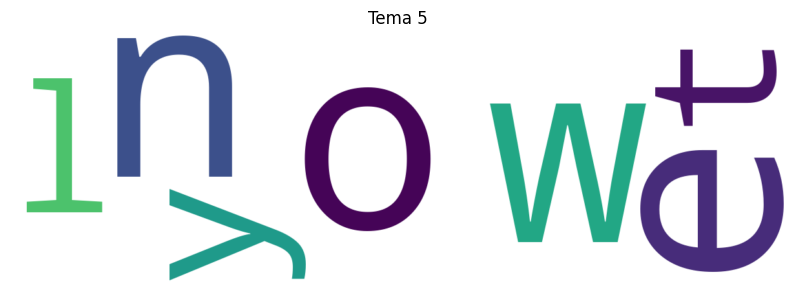

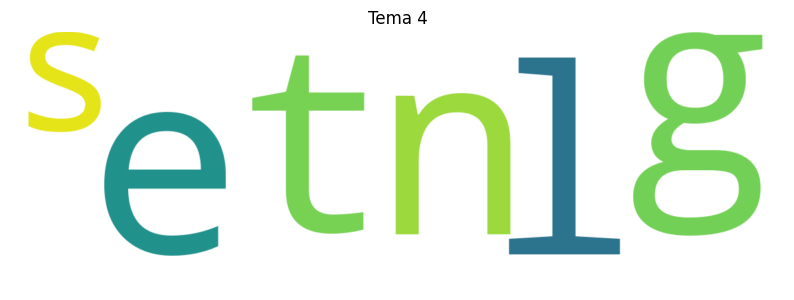

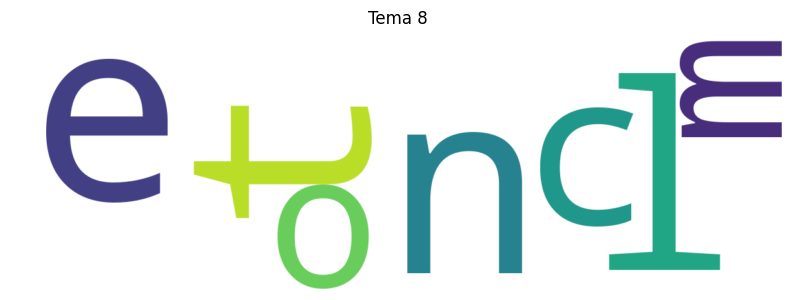

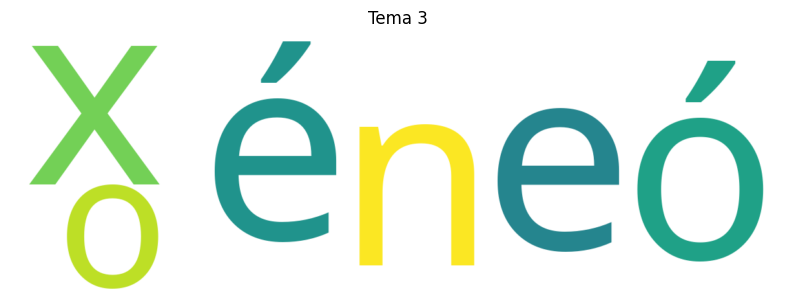

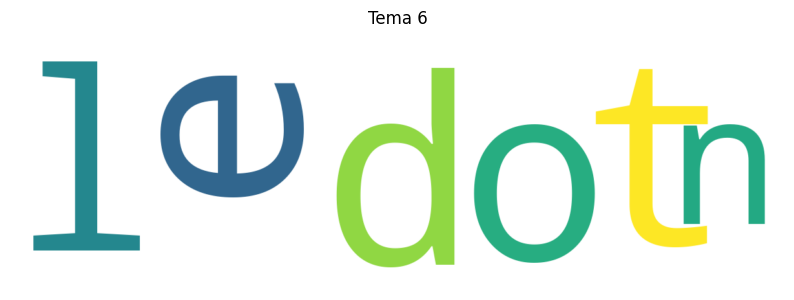

In [ ]:
# Definicion lista de las palabras clave por tema
topics = lda_model.print_topics(num_topics=5, num_words=10)

# Iteracion para crear nube de palabras para cada tema
for topic in topics:
    topic_words = topic[1].split("+")
    topic_words = [word.split("*")[1].strip().strip('"') for word in topic_words]
    topic_words = " ".join(topic_words)

    wordcloud = WordCloud(width=1200, height=400, background_color="white").generate(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("Tema {}".format(topic[0]))
    plt.axis("off")
    plt.show()

In [ ]:
def assigntopic(doc):
    vector = lda_model[dictionary.doc2bow(doc)]
    # opción 1: todos los tópicos ordenados de mayor a menor, podria ser topN tambien asi: return vector[:5] n=5
    vector = sorted(vector, key=lambda item: -item[1])
    # opción 2: asignar el tópico mayor a cada documento
    #vector = max(vector,key=lambda item: item[1])
    return vector

In [ ]:
data3['topics'] = data3.apply(lambda row: assigntopic(row['texto_limpio_2']), axis=1)
df.sample(3)

TypeError: ignored

##Pyspark

A continuación, se utilizará Spark, una potente herramienta de procesamiento de datos, para preparar el texto. Spark es ideal para manejar grandes conjuntos de datos, aunque su velocidad puede depender de la memoria RAM disponible. Para realizar la preparación del texto con PySpark, importaremos librerías clave que incluyen herramientas de tokenización, limpieza y transformación del texto. Esto permitirá procesar eficazmente grandes cantidades de datos de texto y extraer información relevante de los tweets en este proyecto.

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import monotonically_increasing_id, col, expr, when, concat, lit, isnan
from pyspark.ml.linalg import Vectors
from pyspark.ml.regression import GeneralizedLinearRegression
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression
from pyspark.ml.feature import VectorIndexer, VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, RegressionEvaluator, BinaryClassificationEvaluator
from pyspark.ml import Pipeline

In [ ]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, CountVectorizer
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.linalg import Vectors, SparseVector
from pyspark.ml.clustering import LDA, BisectingKMeans
from pyspark.sql.functions import monotonically_increasing_id
import re

In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt

In [ ]:
# stopwords en nltk
from nltk.corpus import stopwords

In [ ]:
df=spark.read.options(inferSchema='True',delimiter=';',header='True') \
  .csv("/content/drive/MyDrive/st1800-232/datasets/twitterClimateData.csv")
df.show(10)

+----------+-----------+-------------+--------------------+--------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+----+--------------------+---------------+---------------+
|Unnamed: 0|         id|    author_id|                text|retweets|           permalink|                date|      formatted_date|favorites|            mentions|            hashtags| geo|                urls|search_hashtags|       location|
+----------+-----------+-------------+--------------------+--------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+----+--------------------+---------------+---------------+
|         0|1.21181e+18|      7.59E17|2020 is the year ...|      15|https://twitter.c...|2019-12-31 00:31:...|Tue Dec 31 00:31:...|       46|                null|#votethemout #cli...|null|                null| #climatestrike|California, USA|
|         1|1.21067e+18|  2.2195

In [ ]:
df=spark.read.options(inferSchema='True',delimiter=';',header='True') \
  .csv("/content/drive/MyDrive/st1800-232/datasets/twitterClimateData.csv")
df.show(10)

+----------+-----------+-------------+--------------------+--------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+----+--------------------+---------------+---------------+
|Unnamed: 0|         id|    author_id|                text|retweets|           permalink|                date|      formatted_date|favorites|            mentions|            hashtags| geo|                urls|search_hashtags|       location|
+----------+-----------+-------------+--------------------+--------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+----+--------------------+---------------+---------------+
|         0|1.21181e+18|      7.59E17|2020 is the year ...|      15|https://twitter.c...|2019-12-31 00:31:...|Tue Dec 31 00:31:...|       46|                null|#votethemout #cli...|null|                null| #climatestrike|California, USA|
|         1|1.21067e+18|  2.2195

In [ ]:
df.printSchema()
df[0]
df = df.fillna({'text': ''})                               # Replace nulls with blank string

# Add Unique ID
df = df.withColumn("id", monotonically_increasing_id())     # Create Unique ID


# Show df (as DataFrame)
df.show(10)

# Print data types
for type in df.dtypes:
    print(type)

target = df.select(df['retweets'].cast(IntegerType()))
target.dtypes

root
 |-- Unnamed: 0: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- author_id: double (nullable = true)
 |-- text: string (nullable = true)
 |-- retweets: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- date: string (nullable = true)
 |-- formatted_date: string (nullable = true)
 |-- favorites: string (nullable = true)
 |-- mentions: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- urls: string (nullable = true)
 |-- search_hashtags: string (nullable = true)
 |-- location: string (nullable = true)

+----------+---+-------------+--------------------+--------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+----+--------------------+---------------+---------------+
|Unnamed: 0| id|    author_id|                text|retweets|           permalink|                date|      formatted_date|favorites|            mentions|          

[('retweets', 'int')]

In [ ]:
################################################################################################
#
#   Text Pre-processing (consider using one or all of the following):
#       - Remove common words (with stoplist)
#       - Handle punctuation
#       - lowcase/upcase
#       - Stemming
#       - Part-of-Speech Tagging (nouns, verbs, adj, etc.)
#
################################################################################################
from nltk.corpus import stopwords
from pyspark.sql.functions import udf,struct
stop_words_nltk = set(stopwords.words('english'))
def textprep(record):
    text  = record[3]
    uid   = record[0]
    tokens = text.split()

    tokens = [re.sub('[^a-zA-Z0-9]','',word) for word in tokens]                                       # Remove special characters
    tokens = [word.lower() for word in tokens if len(word)>2 and word.lower() not in stop_words_nltk]     # Remove stopwords and words under X length
    return tokens

udf_textprep = udf(textprep , ArrayType(StringType()))
df = df.withColumn("words", udf_textprep(struct([df[x] for x in df.columns])))


df.show(5)

+----------+---+-------------+--------------------+--------+--------------------+--------------------+--------------------+---------+-------------------+--------------------+----+--------------------+---------------+---------------+--------------------+
|Unnamed: 0| id|    author_id|                text|retweets|           permalink|                date|      formatted_date|favorites|           mentions|            hashtags| geo|                urls|search_hashtags|       location|               words|
+----------+---+-------------+--------------------+--------+--------------------+--------------------+--------------------+---------+-------------------+--------------------+----+--------------------+---------------+---------------+--------------------+
|         0|  0|      7.59E17|2020 is the year ...|      15|https://twitter.c...|2019-12-31 00:31:...|Tue Dec 31 00:31:...|       46|               null|#votethemout #cli...|null|                null| #climatestrike|California, USA|[2020,

In [ ]:
# Term Frequency Vectorization  (CountVectorizer)    :
cv = CountVectorizer(inputCol="words", outputCol="rawFeatures", vocabSize = 1000)
cvmodel = cv.fit(df)
featurizedData = cvmodel.transform(df)

vocab = cvmodel.vocabulary
vocab_broadcast = sc.broadcast(vocab)

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)
rescaledData.show(10)

+----------+---+-------------+--------------------+--------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+----+--------------------+---------------+---------------+--------------------+--------------------+--------------------+
|Unnamed: 0| id|    author_id|                text|retweets|           permalink|                date|      formatted_date|favorites|            mentions|            hashtags| geo|                urls|search_hashtags|       location|               words|         rawFeatures|            features|
+----------+---+-------------+--------------------+--------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+----+--------------------+---------------+---------------+--------------------+--------------------+--------------------+
|         0|  0|      7.59E17|2020 is the year ...|      15|https://twitter.c...|2019-12-31 00:31:...|Tue Dec

# Parte 2

Realizar un análisis de texto exploratorio básico y aplicar detección de tópicos en este
dataset. A parte de averiguar cómo hallamos el k óptimo, la intuición del número de tópicos
puede ser encontrada en el número de etiquetas diferentes en la columna: ‘search_hashtags

## Inicio del proceso LDA

In [ ]:
!pip install pandas
!pip install numpy
!pip install gensim
!pip install nltk
!pip install pyLDAvis

### Contrucción del BoW

In [ ]:
from gensim.corpora import Dictionary
dictionary = Dictionary(data.texto_limpio)

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in data.texto_limpio]

In [ ]:
print(corpus[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 4)], [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(3, 1), (10, 1), (12, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2)], [(10, 1), (12, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2)], [(47, 1), (48, 1), (49, 1), (50, 1), (51, 1)]]


In [ ]:
print(dictionary)

Dictionary<35044 unique tokens: ['done', 'else', 'future', 'get', 'heart']...>


### Construir matriz de documentos vs términos

In [ ]:
import multiprocessing as mp
import time

t0 = time.time()
pool = mp.Pool(mp.cpu_count())
doc_term_matrix = pool.map(dictionary.doc2bow, [sentence for sentence in data.texto_limpio])
pool.close()
print(time.time()-t0)

2.8497607707977295


### Cálculo de search_hashtags para el conteo de tópicos

In [ ]:
df.select('search_hashtags').distinct().count()

76

## Hallando el K Optimo.


### Ciclo de diferentes K tópicos para encontrar el K-optimo graficando los K de forma creciente y decreciente

####K de 10-30

In [ ]:
results = []

for t in range(10, 30):
    t0 = time.time()
    lda_model = LdaMulticore(doc_term_matrix, num_topics=t, id2word = dictionary, passes=10, workers=10)
    print(time.time()-t0)

    cm = CoherenceModel(model=lda_model, texts=data.texto_limpio, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

294.11451625823975
295.0168352127075
295.99867033958435
291.23755168914795
291.23922967910767
298.83544063568115
293.9770677089691
291.0868356227875
292.6409103870392
292.6831409931183
293.34105014801025
293.14180850982666
288.03778886795044
293.55973839759827
298.9600703716278
296.41578245162964
293.4309675693512
291.0570878982544
298.7806820869446
303.63979029655457


#### Gráfico Coherencia VS K

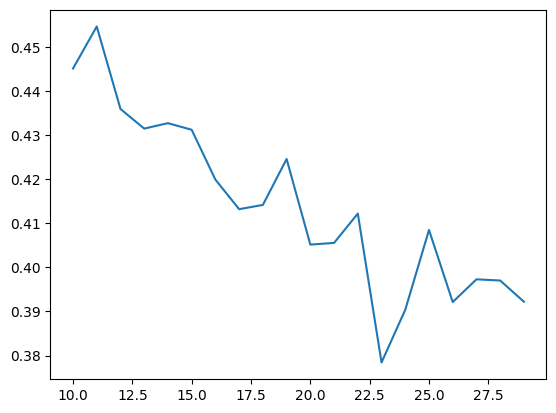

In [ ]:
import matplotlib.pyplot as plt

s = pd.Series(results.score.values, index=results.topic.values)
_ = s.plot()

El K optimo es 11 ya que como podemos ver en la gráfica, es el valor más alto en coherencia en el modelo. Se realizaron análisis alrededor de los otros intervalos entre 1-10 y de 30-76, por cuestiones de tiempos de ejecución, no se realizó la visualización directamente, pero si se realizó el análisis y los valores de coherencia no eran relevantes comparados con el valor de K=11

In [ ]:
data.head()

,text,hashtags,search_hashtags,clean_msg,msg_lower,text_tokenized,text_sin_simbolos,text_sin_stopwords,text_sin_one_letra,text_tokenied_standard,text_sin_simbolos_standard,text_sin_stopwords_standard,text_sin_one_letra_standard,texto_limpio,texto_limpio_2,Subjectivity,Polarity,Positive Negative Word Count,texto_limpio_3
0,"2020 is the year we #votethemout, the year we ...",#votethemout #climatestrike #rebelforlife,#climatestrike,2020 is the year we votethemout the year we cl...,2020 is the year we votethemout the year we cl...,"[2020, is, the, year, we, #votethemout, ,, the...","[is, the, year, we, the, year, we, our, hearts...","[year, year, hearts, year, without, liveable, ...","[year, year, hearts, year, without, liveable, ...","[2020, is, the, year, we, votethemout, the, ye...","[is, the, year, we, votethemout, the, year, we...","[year, votethemout, year, climatestrike, heart...","[year, votethemout, year, climatestrike, heart...","[year, year, heart, year, without, liveable, f...",year year heart year without liveable future n...,0.4625,-0.100000,Negative,"[y, e, a, r, , y, e, a, r, , h, e, a, r, t, ..."
1,Winter has not stopped this group of dedicated...,#climatefriday #climatestrike #ClimateAction,#climatestrike,Winter has not stopped this group of dedicated...,winter has not stopped this group of dedicated...,"[Winter, has, not, stopped, this, group, of, d...","[winter, has, not, stopped, this, group, of, d...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...","[Winter, has, not, stopped, this, group, of, d...","[winter, has, not, stopped, this, group, of, d...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...",winter stopped group dedicated climate activis...,0.0000,0.000000,Positive,"[w, i, n, t, e, r, , s, t, o, p, p, e, d, , ..."
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#ClimateStrike,#climatestrike,WEEK 55 of ClimateStrike at the UN Next week F...,week 55 of climatestrike at the un next week f...,"[WEEK, 55, of, #ClimateStrike, at, the, @UN, ....","[week, of, at, the, next, week, heads, into, i...","[week, next, week, heads, year, striking, time...","[week, next, week, heads, year, striking, time...","[WEEK, 55, of, ClimateStrike, at, the, UN, Nex...","[week, of, climatestrike, at, the, un, next, w...","[week, climatestrike, next, week, heads, year,...","[week, climatestrike, next, week, heads, year,...","[week, next, week, head, year, striking, time,...",week next week head year striking time street ...,0.5000,0.250000,Positive,"[w, e, e, k, , n, e, x, t, , w, e, e, k, , ..."
3,"A year of resistance, as youth protests shaped...",#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,A year of resistance as youth protests shaped ...,a year of resistance as youth protests shaped ...,"[A, year, of, resistance, ,, as, youth, protes...","[a, year, of, resistance, as, youth, protests,...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protests, shaped, cl...","[A, year, of, resistance, as, youth, protests,...","[a, year, of, resistance, as, youth, protests,...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protest, shaped, cli...",year resistance youth protest shaped climate c...,0.6000,-0.133333,Negative,"[y, e, a, r, , r, e, s, i, s, t, a, n, c, e, ..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,HAPPY HOLIDAYS greta gretathunberg climatecha...,happy holidays greta gretathunberg climatecha...,"[HAPPY, HOLIDAYS, #greta, #gretathunberg, #cli...","[happy, holidays, from, the, energy, house, team]","[happy, holidays, energy, house, team]","[happy, holidays, energy, house, team]","[, HAPPY, HOLIDAYS, greta, gretathunberg, clim...","[happy, holidays, greta, gr

### Creación del modelo LDA

In [ ]:
from gensim.models.ldamulticore import LdaMulticore

t0 = time.time()
lda_model = LdaMulticore(doc_term_matrix, num_topics=11, id2word = dictionary, passes=10, workers=10)
print(time.time()-t0)

157.61254262924194


In [ ]:
def assigntopic(doc):
    vector = lda_model[dictionary.doc2bow(doc)] #tópicos ordenados de mayor a menor
    vector = sorted(vector, key=lambda item: -item[1])
    return vector

In [ ]:
data['topics'] = data.apply(lambda row: assigntopic(row['texto_limpio']), axis=1)
data.head()

,text,hashtags,search_hashtags,clean_msg,msg_lower,text_tokenized,text_sin_simbolos,text_sin_stopwords,text_sin_one_letra,text_tokenied_standard,text_sin_simbolos_standard,text_sin_stopwords_standard,text_sin_one_letra_standard,texto_limpio,texto_limpio_2,Subjectivity,topics
0,"2020 is the year we #votethemout, the year we ...",#votethemout #climatestrike #rebelforlife,#climatestrike,2020 is the year we votethemout the year we cl...,2020 is the year we votethemout the year we cl...,"[2020, is, the, year, we, #votethemout, ,, the...","[is, the, year, we, the, year, we, our, hearts...","[year, year, hearts, year, without, liveable, ...","[year, year, hearts, year, without, liveable, ...","[2020, is, the, year, we, votethemout, the, ye...","[is, the, year, we, votethemout, the, year, we...","[year, votethemout, year, climatestrike, heart...","[year, votethemout, year, climatestrike, heart...","[year, year, heart, year, without, liveable, f...",year year heart year without liveable future n...,0.4625,"[(8, 0.5811593), (1, 0.36428043)]"
1,Winter has not stopped this group of dedicated...,#climatefriday #climatestrike #ClimateAction,#climatestrike,Winter has not stopped this group of dedicated...,winter has not stopped this group of dedicated...,"[Winter, has, not, stopped, this, group, of, d...","[winter, has, not, stopped, this, group, of, d...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...","[Winter, has, not, stopped, this, group, of, d...","[winter, has, not, stopped, this, group, of, d...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...",winter stopped group dedicated climate activis...,0.0000,"[(7, 0.6744019), (10, 0.23466441), (4, 0.01010..."
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#ClimateStrike,#climatestrike,WEEK 55 of ClimateStrike at the UN Next week F...,week 55 of climatestrike at the un next week f...,"[WEEK, 55, of, #ClimateStrike, at, the, @UN, ....","[week, of, at, the, next, week, heads, into, i...","[week, next, week, heads, year, striking, time...","[week, next, week, heads, year, striking, time...","[WEEK, 55, of, ClimateStrike, at, the, UN, Nex...","[week, of, climatestrike, at, the, un, next, w...","[week, climatestrike, next, week, heads, year,...","[week, climatestrike, next, week, heads, year,...","[week, next, week, head, year, striking, time,...",week next week head year striking time street ...,0.5000,"[(9, 0.42161137), (5, 0.3923355), (7, 0.158073..."
3,"A year of resistance, as youth protests shaped...",#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,A year of resistance as youth protests shaped ...,a year of resistance as youth protests shaped ...,"[A, year, of, resistance, ,, as, youth, protes...","[a, year, of, resistance, as, youth, protests,...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protests, shaped, cl...","[A, year, of, resistance, as, youth, protests,...","[a, year, of, resistance, as, youth, protests,...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protest, shaped, cli...",year resistance youth protest shaped climate c...,0.6000,"[(6, 0.92422765)]"
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,HAPPY HOLIDAYS greta gretathunberg climatecha...,happy holidays greta gretathunberg climatecha...,"[HAPPY, HOLIDAYS, #greta, #gretathunberg, #cli...","[happy, holidays, from, the, energy, house, team]","[happy, holidays, energy, house, team]","[happy, holidays, energy, house, team]","[, HAPPY, HOLIDAYS, greta, gretathunberg, clim...","[happy, holidays, greta, gretathunberg, climat...","[happy, holidays, greta, gretathunberg, climat...","[happy, holidays, greta, gretathunberg, climat...","[happy, holiday, energy, house,

Se realizó el guardado de los tópicos de forma decreciente tomando los diferentes procentaje de cada tópico con el respectivo texto

##Tomamos el tópico con mayor porcentaje

In [ ]:
topicNumpy = data['topics'].to_numpy()
max_values = []

for lst in topicNumpy:
    max_val = None
    max_score = float("-inf")

    for tup in lst:
        if tup[1] > max_score:
            max_score = tup[1]
            max_val = tup[0]

    max_values.append(max_val)

data['topic'] = max_values

Se realizó el anterior código, para la eliminación de las listas de tuplas y únicamente tomar el número del tópico con mayor porcentaje

In [ ]:
#data['topics'] = data.apply(lambda row: assigntopic(row['msg_lemmatized']), axis=1)
data.head()

,text,hashtags,search_hashtags,clean_msg,msg_lower,text_tokenized,text_sin_simbolos,text_sin_stopwords,text_sin_one_letra,text_tokenied_standard,text_sin_simbolos_standard,text_sin_stopwords_standard,text_sin_one_letra_standard,texto_limpio,texto_limpio_2,Subjectivity,topics,topic
0,"2020 is the year we #votethemout, the year we ...",#votethemout #climatestrike #rebelforlife,#climatestrike,2020 is the year we votethemout the year we cl...,2020 is the year we votethemout the year we cl...,"[2020, is, the, year, we, #votethemout, ,, the...","[is, the, year, we, the, year, we, our, hearts...","[year, year, hearts, year, without, liveable, ...","[year, year, hearts, year, without, liveable, ...","[2020, is, the, year, we, votethemout, the, ye...","[is, the, year, we, votethemout, the, year, we...","[year, votethemout, year, climatestrike, heart...","[year, votethemout, year, climatestrike, heart...","[year, year, heart, year, without, liveable, f...",year year heart year without liveable future n...,0.4625,"[(8, 0.5811593), (1, 0.36428043)]",8
1,Winter has not stopped this group of dedicated...,#climatefriday #climatestrike #ClimateAction,#climatestrike,Winter has not stopped this group of dedicated...,winter has not stopped this group of dedicated...,"[Winter, has, not, stopped, this, group, of, d...","[winter, has, not, stopped, this, group, of, d...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...","[Winter, has, not, stopped, this, group, of, d...","[winter, has, not, stopped, this, group, of, d...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...","[winter, stopped, group, dedicated, climate, a...",winter stopped group dedicated climate activis...,0.0000,"[(7, 0.6744019), (10, 0.23466441), (4, 0.01010...",7
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,#ClimateStrike,#climatestrike,WEEK 55 of ClimateStrike at the UN Next week F...,week 55 of climatestrike at the un next week f...,"[WEEK, 55, of, #ClimateStrike, at, the, @UN, ....","[week, of, at, the, next, week, heads, into, i...","[week, next, week, heads, year, striking, time...","[week, next, week, heads, year, striking, time...","[WEEK, 55, of, ClimateStrike, at, the, UN, Nex...","[week, of, climatestrike, at, the, un, next, w...","[week, climatestrike, next, week, heads, year,...","[week, climatestrike, next, week, heads, year,...","[week, next, week, head, year, striking, time,...",week next week head year striking time street ...,0.5000,"[(9, 0.42161137), (5, 0.3923355), (7, 0.158073...",9
3,"A year of resistance, as youth protests shaped...",#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,A year of resistance as youth protests shaped ...,a year of resistance as youth protests shaped ...,"[A, year, of, resistance, ,, as, youth, protes...","[a, year, of, resistance, as, youth, protests,...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protests, shaped, cl...","[A, year, of, resistance, as, youth, protests,...","[a, year, of, resistance, as, youth, protests,...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protests, shaped, cl...","[year, resistance, youth, protest, shaped, cli...",year resistance youth protest shaped climate c...,0.6000,"[(6, 0.92422765)]",6
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,#greta #gretathunberg #climatechange #fridaysf...,#climatestrike,HAPPY HOLIDAYS greta gretathunberg climatecha...,happy holidays greta gretathunberg climatecha...,"[HAPPY, HOLIDAYS, #greta, #gretathunberg, #cli...","[happy, holidays, from, the, energy, house, team]","[happy, holidays, energy, house, team]","[happy, holidays, energy, house, team]","[, HAPPY, HOLIDAYS, greta, gretathunberg, clim...","[happy, holidays, greta, gretathunberg, climat...","[happy, holidays, greta, gretathunberg, climat...","[happy, holidays, greta, gretathunberg, climat...","[happy, holiday, 

###Ejemplos de tópicos del modelo

In [ ]:
# Se muestran los términos y sus pesos de x documento
print(list(lda_model[doc_term_matrix[0]]))

# Se muestran los términos más relevantes de los tópicos y sus pesos
print(lda_model.print_topics(num_topics=11, num_words=3))

[(1, 0.36437434), (8, 0.58106536)]
[(3, '0.010*"time" + 0.006*"university" + 0.006*"people"'), (7, '0.030*"climate" + 0.030*"today" + 0.018*"people"'), (9, '0.039*"climate" + 0.022*"change" + 0.017*"action"'), (4, '0.012*"u" + 0.008*"tree" + 0.008*"take"'), (6, '0.017*"change" + 0.015*"climate" + 0.015*"park"'), (10, '0.010*"great" + 0.008*"fire" + 0.007*"day"'), (0, '0.033*"new" + 0.011*"green" + 0.011*"climate"'), (2, '0.011*"water" + 0.010*"plastic" + 0.009*"world"'), (8, '0.013*"need" + 0.008*"better" + 0.008*"future"'), (1, '0.016*"one" + 0.011*"year" + 0.008*"time"')]


###Coherencia con u_mass

In [ ]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel



cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value

print(coherence)

-3.967397153195256


La coherencia u_mass está en el intervalo definido

###Coherencia con c_v

In [ ]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

cm = CoherenceModel(model=lda_model, texts=data.texto_limpio, coherence='c_v')
coherence2=cm.get_coherence()

print(coherence2)

0.4234259058873331


La coherencia c_v está en el intervalo definido

## search_hashtags a números


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/st1800-232/datasets/twitterClimateData.csv', delimiter=';')


In [ ]:
arr=np.unique(df2.search_hashtags.unique(), return_index=True)
arr

(array(['#actonclimate', '#bushfires', '#climateaction', '#climatechange',
        '#climatecrisis', '#climatestrike', '#environment',
        '#fridaysforfuture', '#globalwarming', '#greennewdeal',
        '#savetheplanet', '#sustainability'], dtype=object),
 array([ 8, 11,  4,  1,  3,  0,  6,  5,  7,  2, 10,  9]))

In [ ]:
def returnindex(element):
  unique_hashtags = df2.search_hashtags.unique()
  index = np.where(unique_hashtags == element)[0][0]
  return index

In [ ]:
df2.head()

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.21067e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.21059e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"
3,3,1.21026e+18,1.339821e+09,"A year of resistance, as youth protests shaped...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA"
4,4,1.20964e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA"


In [ ]:
df2['label'] = df2['search_hashtags'].apply(lambda x:returnindex(x))

In [ ]:
df2.head()

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location,label
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA",0
1,1,1.21067e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA",0
2,2,1.21059e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA",0
3,3,1.21026e+18,1.339821e+09,"A year of resistance, as youth protests shaped...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA",0
4,4,1.20964e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA",0


Se vio la necesidad de pasar los search_hashtags a a número para su uso como labels en el proceso de clasificación

In [ ]:
df2.query("label != 0").head(100)

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location,label
2380,2380,1.21214e+18,1.120000e+18,Addressing #ClimateChange means tackling funda...,0,https://twitter.com/Phil4Sustain/status/121213...,2019-12-31 22:25:35+00:00,Tue Dec 31 22:25:35 +0000 2019,1,NaN,#ClimateChange #ClimateCrisis #Philosophy #Sus...,NaN,https://www.washingtonpost.com/climate-solutio...,#climatechange,"California, USA",1
2381,2381,1.21204e+18,3.214005e+08,this is the language of #ClimateChange,0,https://twitter.com/AndersReynolds/status/1212...,2019-12-31 15:43:14+00:00,Tue Dec 31 15:43:14 +0000 2019,2,NaN,#ClimateChange,NaN,https://twitter.com/passantino/status/12118117...,#climatechange,"California, USA",1
2382,2382,1.21202e+18,7.970000e+17,What we know so far about the Australian bushf...,0,https://twitter.com/VictoriaBaldas2/status/121...,2019-12-31 14:45:33+00:00,Tue Dec 31 14:45:33 +0000 2019,0,NaN,#ClimateChange,NaN,https://www.theguardian.com/australia-news/201...,#climatechange,"California, USA",1
2383,2383,"1,212E+21",1.849253e+07,"Lives have been lost, homes destroyed, wildlif...",6,https://twitter.com/antissa/status/12120044126...,2019-12-31 13:35:44+00:00,Tue Dec 31 13:35:44 +0000 2019,4,NaN,#ClimateChange #AustralianFires,NaN,NaN,#climatechange,"California, USA",1
2384,2384,1.21197e+18,2.336468e+08,"As the #ClimateCrisis deepens, potable water w...",1,https://twitter.com/theheidifeed/status/121197...,2019-12-31 11:21:16+00:00,Tue Dec 31 11:21:16 +0000 2019,0,NaN,#ClimateCrisis #ClimateEmergency #ClimateChange,NaN,https://twitter.com/karenmcveigh1/status/12119...,#climatechange,"California, USA",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,2475,1.20621e+18,2.509162e+08,"In #Australia, record fires burn out of contro...",1,https://twitter.com/therockyfiles/status/12062...,2019-12-15 14:06:24+00:00,Sun Dec 15 14:06:24 +0000 2019,0,NaN,#Australia #climate #climatechange,NaN,https://twitter.com/NSWRFS/status/120611768012...,#climatechange,"California, USA",1
2476,2476,1.20601e+18,3.396350e+09,#sallyfield #janefonda #winonaleduke #firedril...,0,https://twitter.com/johnlamparskii/status/1206...,2019-12-15 00:40:18+00:00,Sun Dec 15 00:40:18 +0000 2019,1,NaN,#sallyfield #janefonda #winonaleduke #firedril...,NaN,NaN,#climatechange,"California, USA",1
2477,2477,1.20601e+18,3.396350e+09,#sallyfield #janefonda #winonaleduke #firedril...,0,https://twitter.com/johnlamparskii/status/1206...,2019-12-15 00:40:07+00:00,Sun Dec 15 00:40:07 +0000 2019,1,NaN,#sallyfield #janefonda #winonaleduke #firedril...,NaN,NaN,#climatechange,"California, USA",1
2478,2478,1.20595e+18,2.023192e+08,Yes I feel cooler already and noticed the ocea...,0,https://twitter.com/kbaxterwilliams/status/120...,2019-12-14 20:26:39+00:00,Sat Dec 14 20:26:39 +0000 2019,0,NaN,#ClimateHoax #ClimateChange #ClimateAction,NaN,https://twitter.com/robbystarbuck/status/12059...,#climatechange,"California, USA",1


# Parte 3

Realizar un modelo de clasificación de texto, entrenando un modelo basado en una
etiqueta (label) extraído de 1) la columna ‘search_hashtags’ así como 2) los tópicos de la Parte2,
en el dataset. Realizar la comparación entre ambos acercamientos a través de mecanismos de
evaluación con precision/recall/f1-score. Utilizar de forma obligatoria un clasificador
Multinomial de Naive Bayes (MultinomialNB) y al menos otro clasificador como LinearSVC,
RandomForest, Regresión Logistica, etc. Realice la comparación de acuerdo con las métricas de
evaluación de modelos precision/recall/f1-score.

In [ ]:
from textblob.compat import csv
from gensim.utils import multiprocessing
from sklearn.model_selection import train_test_split
import gensim as gs
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import multiprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import utils
import csv

nltk.download ('wordnet')



train, test = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

NameError: ignored

In [ ]:
documents = train.apply(
    lambda r: TaggedDocument(words=r['texto_limpio_2'], tags=[r['topic']]), axis=1)
documentsTest = test.apply(
    lambda r: TaggedDocument(words=r['texto_limpio_2'], tags=[r['topic']]), axis=1)

In [ ]:
cores = multiprocessing.cpu_count()
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=cores)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
def vector_for_learning(model, input_docs):
  sents = input_docs
  targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector([doc.words], epochs=20))for doc in sents])
  return targets, feature_vectors

In [ ]:
documents[0:1]

22556    (newton city councilors voice support student ...
dtype: object

In [ ]:
y_train, X_train =vector_for_learning(model, documents)
y_test, X_test = vector_for_learning(model, documentsTest)

In [ ]:
model.save('modelDoc2Vec')

In [ ]:
logreg = GaussianNB()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf
from tensorflow.keras.metrics import Accuracy, Precision, Recall


print('Probando exactitud con el modelo LDA topics: %s' % accuracy_score(y_test, y_pred))
print('Probando el puntaje F1 con el modelo LDA topics: {}'.format(f1_score(y_test, y_pred, average='weighted')))


Probando exactitud con el modelo LDA topics: 0.1527483657121812
Probando el puntaje F1 con el modelo LDA topics: 0.06710111917162721


Mediante esta respuesta, se entiene que la exactitud del modelo de topicos no es muy precisa, ya que corresponde unicamente a que dio un resultado beneficioso en el 15.27% de las veces. En la práctica, no sería util para un análista usar este modelo ya que dejaría por fuera aproximadamente el 84% de los resultados y esto conllevaría a una mala toma de decisiones.

# Probando con Search Hashtags

In [ ]:
train, test = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
documents_sh = train.apply(
    lambda r: TaggedDocument(words=r['texto_limpio_2'], tags=[r[df2.label]]), axis=1)
documentsTest_sh = test.apply(
    lambda r: TaggedDocument(words=r['texto_limpio_2'], tags=[r[df2.label]]), axis=1)

NameError: ignored

In [ ]:
cores_sh = multiprocessing.cpu_count()
model_sh = Doc2Vec(documents_sh, vector_size=5, window=2, min_count=1, workers=cores)
model.train(documents_sh, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
def vector_for_learning(model_sh, input_docs):
  sents_sh = input_docs
  targets_sh, feature_vectors_sh = zip(*[(doc.tags[0], model.infer_vector([doc.words], epochs=20))for doc in sents])
  return targets_sh, feature_vectors_sh

In [ ]:
y_train, X_train =vector_for_learning(model_sh, documents_sh)
y_test, X_test = vector_for_learning(model_sh, documentsTest_sh)

In [ ]:
logreg_sh = GaussianNB()
logreg_sh.fit(X_train_sh,y_train_sh)
y_pred_sh = logreg.predict(X_test_sh)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf
from tensorflow.keras.metrics import Accuracy, Precision, Recall


print('Probando exactitud con search hashtags: %s' % accuracy_score(y_test, y_pred))
print('Probando el puntaje F1 con search hashtags: {}'.format(f1_score(y_test, y_pred, average='weighted')))


BoW

## Naive Bayes

Este código lleva a cabo el entrenamiento y evaluación de un modelo de Clasificador Multinomial Naive Bayes para una tarea de clasificación de texto

En primer lugar, se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split.

Luego, se crea una instancia del modelo de Clasificador Multinomial Naive Bayes.

Además, se configuran dos componentes fundamentales: CountVectorizer y TfidfTransformer, los cuales son responsables de extraer características del texto.

A continuación, se aplica CountVectorizer únicamente a los datos de entrenamiento, transformándolos tanto para el conjunto de entrenamiento como para el conjunto de prueba en matrices dispersas que representan los recuentos de términos.

Seguidamente, TfidfTransformer convierte estos recuentos en pesos TF-IDF, que otorgan importancia a los términos en función de su frecuencia y su rareza en el corpus.

El modelo de Naive Bayes es entrenado utilizando los datos y los pesos TF-IDF del conjunto de entrenamiento.

Luego, se evalúa el rendimiento del modelo utilizando los datos de prueba y se calcula la precisión (accuracy).

Por último, se realizan predicciones sobre el conjunto de prueba para evaluar el desempeño del modelo en datos no vistos

In [ ]:
!pip install --upgrade numpy pandas

In [ ]:
col = ['texto_limpio_2', 'hashtags']
data3 = data3[col]
data3 = data3[pd.notnull(data3['hashtags'])]
data3.columns = ['texto_limpio_2', 'hashtags']
data3['category_id'] = data3['hashtags'].factorize()[0]
category_id_df = data3[['texto_limpio_2', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'texto_limpio_2']].values)
data3.head()

In [ ]:
data3['category_id'].unique()

In [ ]:
##Bibligrafia del codigo en https://github.com/st1800eafit/st1800-232/blob/main/text-mining/classifier-nb/Consumer_complaints.ipynb**

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data3['texto_limpio_2'], data3['category_id'], test_size=0.2)

# Inicializar el modelo de Naive Bayes multinomial
modelo = MultinomialNB()

# Inicializar CountVectorizer y TfidfTransformer
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

# Ajustar CountVectorizer solo en los datos de entrenamiento y transformar ambos conjuntos
X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Entrenar el modelo con los datos de entrenamiento
clf = modelo.fit(X_train_tfidf, y_train)

# Evaluar el modelo en los datos de prueba
result = clf.score(X_test_tfidf, y_test)
y_pred = clf.predict(X_test_tfidf)

# Guardar el modelo entrenado en un archivo
pickle.dump(clf, open("file.model", "wb"))

print("Accuracy:", result)

In [ ]:
data3[['texto_limpio_2','hashtags','category_id']].sample(3)

se pretende hacer una revisión del modelo por medio de una matriz de confusión, en esta matriz, se podrá identificar la presición del modelo de manera numerica, en donde muestre la veracidad de los resultados, asi como aquellos en los que se equivoca, para poder determinar si el modelo es apto para uso en la análitica de datos.

In [ ]:
# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("=="*50)

# Matriz de confusión
plt.figure(figsize=(8, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()



## K-MEANS

Tomado de [https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/st1800-232/datasets/twitterClimateData.csv", delimiter=';')
df.head()

NameError: ignored

In [ ]:
df = df.drop(["Unnamed: 0"], axis=1)

In [ ]:
# Contar hasttags
counts = df['hashtags'].value_counts()
# Filtra los valores que aparecen al menos 6 veces
filtered_counts = counts.loc[counts >= 6]

In [ ]:
# n_features: Cantidad de los caracteristicas (hashtags)
n_samples = len(filtered_counts)
# n_samples: es el número total de puntos dividido equitativamente entre los cluster.
n_features = 2
# n_cluster : Numero de cluster analizar
n_clusters = 4

In [ ]:
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=0)

In [ ]:
kmeans = KMeans(n_clusters)

In [ ]:
kmeans.fit(X)

In [ ]:
labels = kmeans.labels_
#labels
# Calculo de los centroides
centroids = kmeans.cluster_centers_
#centroids

In [ ]:
# Grafica del K-Mean

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroides')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.title('Hashtags K-Means')
plt.show()

In [ ]:
# 1) Preparar los datos
X = data3['texto_limpio_2']  # Las características serán el texto
y = data3['hashtags']  # Las etiquetas serán las búsquedas de hashtags

# 2) Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3) Vectorizar el texto (TF-IDF)
vectorizer = TfidfVectorizer(max_features=500)  # Puedes ajustar el número máximo de características según tus necesidades
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# 4) Entrenar el modelo Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# 5) Entrenar otro clasificador, por ejemplo LinearSVC
svc_classifier = LinearSVC()
svc_classifier.fit(X_train, y_train)
svc_predictions = svc_classifier.predict(X_test)

# 6) Evaluar los modelos
# Para Naive Bayes
nb_report = classification_report(y_test, nb_predictions)
print("Reporte de Naive Bayes:")
print(nb_report)

# Para LinearSVC
svc_report = classification_report(y_test, svc_predictions)
print("\nReporte de LinearSVC:")
print(svc_report)


## Comparacion de los modelos de clasificiacion de texto.

# Bibliografia



*   https://www.kaggle.com/code/satishgunjal/tokenization-in-nlp
*   https://blog.devgenius.ioreprocessing-twitter-dataset-using-nltk-approach-1beb9a338cc1


*   https://www.kaggle.com/code/prashant111/a-beginners-guide-to-dealing-with-text-data
*   https://elblogpython.com/machine-learning/k-means-agrupacion-de-texto/
*  https://wusfnews.wusf.usf.edu/environment/2023-03-19/can-florida-survive-climate-change-heres-what-the-aspen-ideas-climate-conference-had-to-say
*   https://towardsdatascience.com/top-5-word-tokenizers-that-every-nlp-data-scientist-should-know-45cc31f8e8b9#:~:text=Punctuation%2Dbased%20tokenization%20is%20slightly,a%20meaningful%20%E2%80%9CJones%E2%80%9D%20token.





